In [144]:
import delimited "/Users/santerivaataja/Desktop/Taloustieteen_kursseja/Econometrics/Capstone.nosync/Econometrics-Capstone/raw_data/small_master_c.csv", clear

(92 vars, 132 obs)


In [143]:
set scheme s1mono

In [137]:
qui {
    gen ln_gdp = ln(gdp)
    xtset countrycode year
    egen civilsocietytraditions_mean = mean(civilsocietytraditions)
    gen civilsocietytraditions_c = civilsocietytraditions - civilsocietytraditions_mean
}

In [140]:
xtreg ln_gdp democracy civilsocietytraditions rol broadband life_expectancy, fe r

no observations
r(2000);



In [139]:
reg ln_gdp democracy civilsocietytraditions rol broadband life_expectancy i.countrycode, r


Linear regression                               Number of obs     =        132
                                                F(69, 61)         =          .
                                                Prob > F          =          .
                                                R-squared         =     0.9824
                                                Root MSE          =     .22912

-------------------------------------------------------------------------------
              |               Robust
       ln_gdp |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
    democracy |  -.0516336   .0974646    -0.53   0.598    -.2465261    .1432588
civilsociet~s |  -.0984079   .0418084    -2.35   0.022    -.1820089   -.0148069
          rol |   .3975796   .1262305     3.15   0.003      .145166    .6499932
    broadband |   2.73e-09   2.01e-10    13.58   0.000     2.33e-09    3.14e-09
life_e

In [127]:
vif


    Variable |       VIF       1/VIF  
-------------+----------------------
   democracy |     10.12    0.098846
civilsocie~s |     22.74    0.043974
         rol |     31.27    0.031976
   broadband |      3.28    0.304720
life_expec~y |     12.85    0.077848
 countrycode |
          7  |      2.89    0.346262
          8  |      2.94    0.340151
         12  |      2.36    0.423670
         17  |      2.20    0.453746
         20  |      3.69    0.271053
         30  |      3.27    0.305917
         33  |      3.14    0.318583
         39  |      6.35    0.157525
         40  |      5.32    0.187809
         41  |      2.75    0.363961
         46  |      4.90    0.204278
         48  |      3.58    0.279550
         49  |      2.37    0.422781
         52  |      6.52    0.153472
         56  |      2.71    0.369287
         57  |      2.69    0.371905
         59  |      2.66    0.375644
         62  |      6.76    0.147966
         69  |      3.30    0.302789
         71  |      

In [141]:
%browse 5 continentcat

,continentcat


In [27]:
pwcorr democracy civilsocietytraditions rol trade broadband life_expectancy tech_exp broadband


             | democr~y civils~s      rol    trade broadb~d life_e~y tech_exp
-------------+---------------------------------------------------------------
   democracy |   1.0000 
civilsocie~s |  -0.5059   1.0000 
         rol |   0.3178  -0.6502   1.0000 
       trade |  -0.0824  -0.1745   0.5190   1.0000 
   broadband |   0.1410  -0.4156   0.5951   0.4695   1.0000 
life_expec~y |   0.2572  -0.3335   0.4677   0.2816   0.6118   1.0000 
    tech_exp |   0.1241  -0.3335   0.3223   0.2835   0.4103   0.2813   1.0000 
   broadband |   0.1410  -0.4156   0.5951   0.4695   1.0000   0.6118   0.4103 

             | broadb~d
-------------+---------
   broadband |   1.0000 




.     de

Contains data
  obs:           110                          
 vars:            58                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
country         str14   %14s                  
year            int     %8.0g                 
tech_exp        float   %9.0g                 
tech_exp1       float   %9.0g                 algeria
tech_exp2       float   %9.0g                 argentina
tech_exp3       float   %9.0g                 armenia
tech_exp4       float   %9.0g                 azerbaijan
tech_exp5       float   %9.0g                 belarus
tech_exp6       float   %9.0g                 cameroon
tech_exp7       float   %9.0g                 chile
tech_exp8       float   %9.0g                 china
tech_exp9       float   %9.0g            

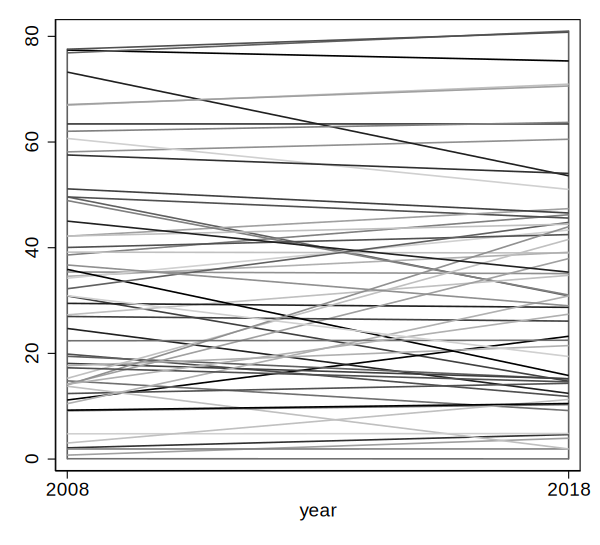

.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
. }            

. qui restore


In [6]:
qui {
preserve
    keep year country tech_exp
    separate tech_exp, by(country) veryshortlabel 
    sort year
    }
    de
    line tech_exp* year, xlabel(2008 2018) ysize(5) leg(off)
qui restore

In [12]:
ssc install egenmore

checking egenmore consistency and verifying not already installed...
all files already exist and are up to date.


In [16]:
drop mean_tech_ex
bysort year: egen mean_tech_ex = mean(tech_exp) if _n == 1



(108 missing values generated)


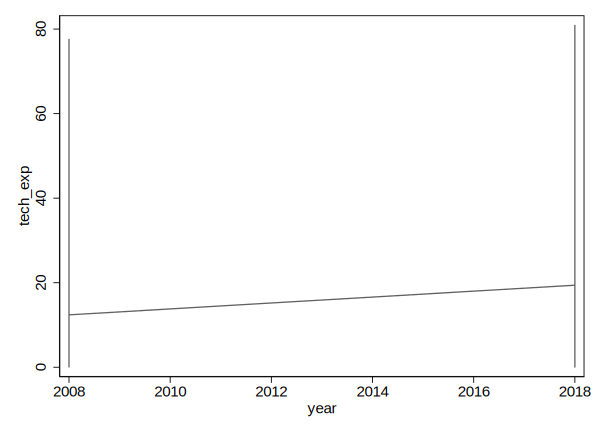

In [17]:
line tech_exp year

    broadband |   .0093601   .0045492     2.06   0.044     .0002663    .0184539